<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning1/blob/main/arbitrary_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessng

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv("titanic_toy (1).csv")

In [ ]:
df.head(3)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1


In [ ]:
X=df.drop("Survived", axis=1)
y=df['Survived']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=2)

In [ ]:
X_train["Age_1"]=X_train["Age"].fillna(-1)
X_train["Age_99"]=X_train["Age"].fillna(99)

X_train["Fare_1"]=X_train["Fare"].fillna(-1)
X_train["Fare_999"]=X_train["Fare"].fillna(999)

In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_1'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_99'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_1'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_999'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  318.0896202624484
Age Variance after -1 wala imputation:  951.7275570187172
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  2378.5676784883503
Fare Variance after -1 wala imputation:  47219.20265217623


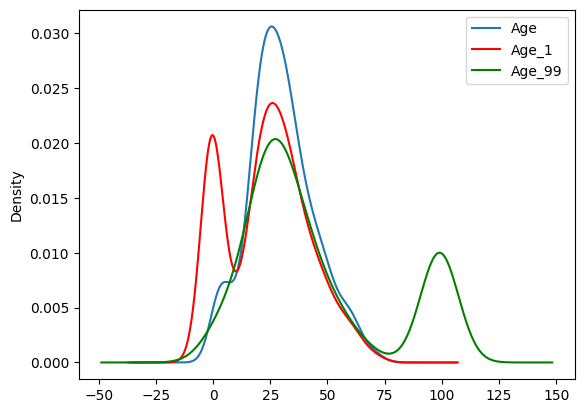

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train["Age"].plot(kind='kde', ax=ax)
X_train["Age_1"].plot(kind='kde', ax=ax, color="red")
X_train["Age_99"].plot(kind='kde', ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



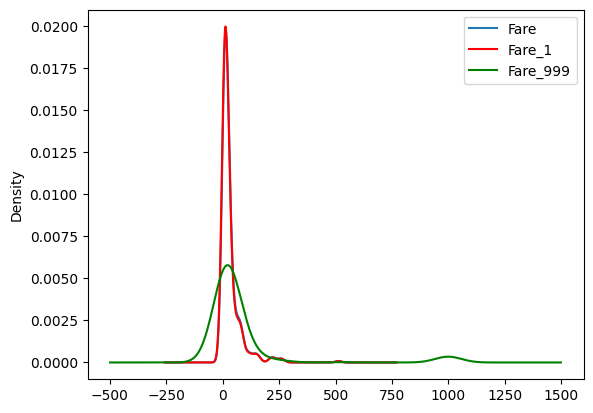

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train["Fare"].plot(kind='kde', ax=ax)
X_train["Fare_1"].plot(kind='kde', ax=ax, color="red")
X_train["Fare_999"].plot(kind='kde', ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



In [ ]:
X_train.corr()


,Age,Fare,Family,Age_1,Age_99,Fare_1,Fare_999
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.084585,0.051179
Fare,0.092644,1.000000,0.208268,0.142022,-0.066273,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.140668,-0.144787,0.205233,0.032079
Age_1,1.000000,0.142022,-0.140668,1.000000,-0.344476,0.131514,0.066411
Age_99,1.000000,-0.066273,-0.144787,-0.344476,1.000000,-0.062687,-0.023857
Fare_1,0.084585,1.000000,0.205233,0.131514,-0.062687,1.000000,0.071946
Fare_999,0.051179,1.000000,0.032079,0.066411,-0.023857,0.071946,1.000000


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
imputer1=SimpleImputer(strategy='constant', fill_value=99)
imputer2=SimpleImputer(strategy='constant', fill_value=999)


In [ ]:
trf=ColumnTransformer([
    ("imputer1", imputer1, ["Age"]),
    ("imputer2", imputer1, ["Fare"])

], remainder='passthrough')

In [ ]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
trf.feature_names_in_

array(['Age', 'Fare', 'Family'], dtype=object)

In [ ]:
X_train_new=trf.transform(X_train)
X_test_new=trf.transform(X_test)

In [ ]:
new_df=pd.DataFrame(X_train_new, columns=trf.feature_names_in_)

In [ ]:
new_df.isnull().sum()

,0
Age,0
Fare,0
Family,0
